<a href="https://colab.research.google.com/github/githubdcw/KU-WPT/blob/main/data/s2p/mutual_inductance003_from_s2p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install https://scikit-rf.readthedocs.io/en/latest/

In [19]:
!pip -q install scikit-rf 

In [20]:
import numpy as np
import pandas as pd
import skrf as rf
from skrf import Network, Frequency
import scipy.constants as const
e0 =const.epsilon_0

## Sonnet file

Port need to be setup as 003 version.  
https://raw.githubusercontent.com/githubdcw/KU-WPT/main/data/s2p/sq_coil003.son

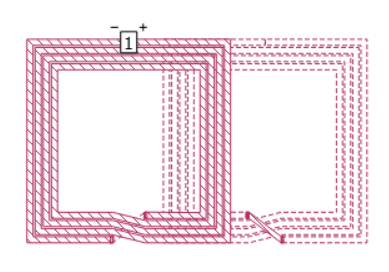

Download simulated result for square coil.

In [36]:
!wget https://raw.githubusercontent.com/githubdcw/KU-WPT/main/data/s2p/sq_coil003.s2p
!wget https://raw.githubusercontent.com/githubdcw/KU-WPT/main/data/s2p/sq_coil004.s2p

--2022-12-10 16:54:43--  https://raw.githubusercontent.com/githubdcw/KU-WPT/main/data/s2p/sq_coil003.s2p
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 509 [text/plain]
Saving to: ‘sq_coil003.s2p’

sq_coil003.s2p      100%[===================>]     509  --.-KB/s    in 0s      

2022-12-10 16:54:44 (21.2 MB/s) - ‘sq_coil003.s2p’ saved [509/509]

--2022-12-10 16:54:44--  https://raw.githubusercontent.com/githubdcw/KU-WPT/main/data/s2p/sq_coil004.s2p
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 509 [text/plain]
Saving to: ‘sq_coi

Load data to Network.

In [37]:
coil3 = Network('/content/sq_coil003.s2p')
coil4 = Network('/content/sq_coil004.s2p')

In [38]:
print(coil3)

2-Port Network: 'sq_coil003',  0.013-0.014 GHz, 2 pts, z0=[50.+0.j 50.+0.j]


Find INPUT impedance of the coil.

In [39]:
S3 = coil3.s
print(S3)
print('')
S4 = coil4.s
print(S4)


[[[ 0.92064568+0.38596659j -0.01532713+0.03680371j]
  [-0.01532713+0.03680371j  0.91959451+0.38846776j]]

 [[ 0.93429933+0.35156657j -0.01341027+0.03595691j]
  [-0.01341027+0.03595691j  0.93341042+0.35392356j]]]

[[[0.92064568+0.38596659j 0.01532713-0.03680371j]
  [0.01532713-0.03680371j 0.91959451+0.38846776j]]

 [[0.93429933+0.35156657j 0.01341027-0.03595691j]
  [0.01341027-0.03595691j 0.93341042+0.35392356j]]]


In [40]:
Z3 = coil3.z
print(Z3)
Z4 = coil4.z
print(Z4)


[[[ 0.63308359+251.14332506j -0.21706771 -25.74631178j]
  [-0.21706771 -25.74631178j  0.62400283+249.39119484j]]

 [[ 0.84006632+278.03177007j -0.29684234 -30.11716702j]
  [-0.29684234 -30.11716702j  0.82782894+276.05479626j]]]
[[[0.63308359+251.14332506j 0.21706771 +25.74631178j]
  [0.21706771 +25.74631178j 0.62400283+249.39119484j]]

 [[0.84006632+278.03177007j 0.29684234 +30.11716702j]
  [0.29684234 +30.11716702j 0.82782894+276.05479626j]]]


In [41]:
Z = Z3

In [42]:
Z[0][0][1]

(-0.2170677126513496-25.74631177897771j)

Find Inducetance.  
$X_L = 2 \pi f L$  
$L = \frac {X_L}{2 \pi f}$

In [43]:
tmp = Z
print('Mutual Inductance of the coil at', coil.frequency.f[0],'Hz is', tmp [0][0][1].imag/(2*np.pi*coil.frequency.f[0]), 'H')
print('Mutual Inductance of the coil at', coil.frequency.f[1],'Hz is', tmp [1][0][1].imag/(2*np.pi*coil.frequency.f[1]), 'H')


Mutual Inductance of the coil at 13000000.0 Hz is -3.1520406046226095e-07 H
Mutual Inductance of the coil at 14000000.0 Hz is -3.4237828597356977e-07 H


In [44]:
tmp = Z
print('Mutual Inductance of the coil at', coil.frequency.f[0]/1e6,'MHz is', "{:.2f}".format(tmp [0][0][1].imag/(2*np.pi*coil.frequency.f[0])*1e6), 'uH')
print('Mutual Inductance of the coil at', coil.frequency.f[1]/1e6,'MHz is', "{:.2f}".format(tmp [1][0][1].imag/(2*np.pi*coil.frequency.f[1])*1e6), 'uH')


Mutual Inductance of the coil at 13.0 MHz is -0.32 uH
Mutual Inductance of the coil at 14.0 MHz is -0.34 uH
